# Visualizing MNIST Data Set with Neural Networks

11490434/11490434 [==============================] - 0s 0us/step


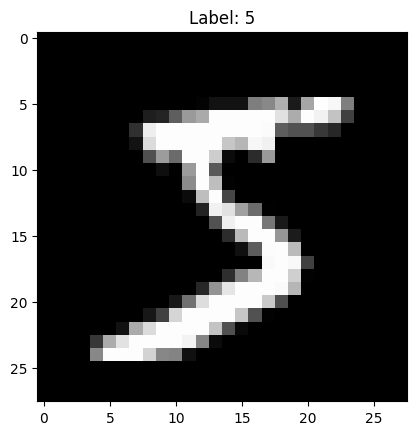

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the dataset
x_train, x_test = x_train / 255.0, x_test / 255.0

# Display the first image in the training set
plt.imshow(x_train[0], cmap='gray')
plt.title(f'Label: {y_train[0]}')
plt.show()

# Check the shapes of the datasets
print(f'Training data shape: {x_train.shape}')
print(f'Test data shape: {x_test.shape}')


In [64]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Store weights, biases, and outputs
weights_list = []
biases_list = []
outputs_list = []

class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # Collect weights and biases
        weights = []
        biases = []
        for layer in model.layers:
            if hasattr(layer, 'kernel'):
                weights.append(layer.get_weights()[0])
            if hasattr(layer, 'bias'):
                biases.append(layer.get_weights()[1])

        # Predict on a subset of data (e.g., x_test)
        outputs = model.predict(x_test[:100])  # Predicting on a smaller subset for efficiency

        # Store the collected data
        weights_list.append(weights)
        biases_list.append(biases)
        outputs_list.append(outputs)
        print(f"Epoch {epoch} ended.")
        print(f"Weights length: {len(weights)}")  # Debugging statement
        print(f"Biases length: {len(biases)}")    # Debugging statement
        print(f"Outputs shape: {outputs.shape}")  # Debugging statement

model.fit(x_train, y_train, epochs=15, callbacks=[CustomCallback()])
model.evaluate(x_test, y_test)




Epoch 1/15
4/4 [==============================] - 0s 3ms/step
Epoch 0 ended.
Weights length: 2
Biases length: 2
Outputs shape: (100, 10)
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2601 - accuracy: 0.9259
Epoch 2/15
4/4 [==============================] - 0s 3ms/step
Epoch 1 ended.
Weights length: 2
Biases length: 2
Outputs shape: (100, 10)
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1151 - accuracy: 0.9665
Epoch 3/15
4/4 [==============================] - 0s 3ms/step
Epoch 2 ended.
Weights length: 2
Biases length: 2
Outputs shape: (100, 10)
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0792 - accuracy: 0.9763
Epoch 4/15
4/4 [==============================] - 0s 4ms/step
Epoch 3 ended.
Weights length: 2
Biases length: 2
Outputs shape: (100, 10)
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0580 - accuracy: 0.9829
Epoch 5/15
4/4 [==============================] - 0s 3ms/step
Epoch 4 ended.
Weights len

[0.09921063482761383, 0.9789999723434448]

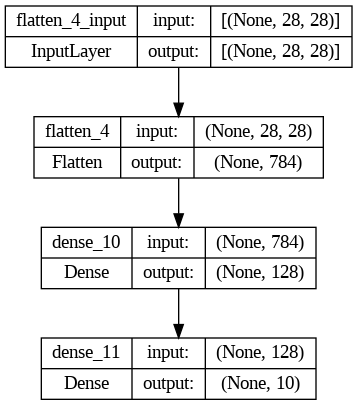

In [75]:
from tensorflow.keras.utils import plot_model

# Save the model architecture as an image
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)


In [65]:
# Access collected data
print(f'Number of recorded weights: {len(weights_list)}')
print(f'Number of recorded biases: {len(biases_list)}')
print(f'Number of recorded outputs: {len(outputs_list)}')

Number of recorded weights: 15
Number of recorded biases: 15
Number of recorded outputs: 15


In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming x_train is large and outputs_list contains predictions for a subset
# For example, if outputs_list[epoch] is predictions for a subset of x_test

for epoch in range(len(weights_list)):
    plt.figure(figsize=(10, 6))

    # Plot actual data (use a subset of x_train for consistency)
    subset_size = 100  # Size of the subset used for prediction
    subset_indices = np.arange(subset_size)

    # Plot actual data
    plt.scatter(subset_indices, y_train[:subset_size], label='Actual Data', alpha=0.6)

    # Model predictions (flatten if necessary)
    predictions = outputs_list[epoch]  # Assuming this has shape (subset_size, num_classes)

    # Convert predictions to class labels if necessary
    predicted_classes = np.argmax(predictions, axis=1)  # Shape should match (subset_size,)

    # Plot model predictions
    plt.plot(subset_indices, predicted_classes, label='Model Prediction', linestyle='--')

    plt.title(f'Epoch {epoch + 1}')
    plt.legend()
    plt.xlabel('Sample Index')
    plt.ylabel('Predicted Class')
    plt.grid(True)
    plt.savefig(f'epoch_{epoch + 1}.png')
    plt.close()


In [67]:
import imageio

# Create a GIF from the saved plots
images = []
for epoch in range(len(weights_list)):
    filename = f'epoch_{epoch + 1}.png'
    images.append(imageio.imread(filename))

imageio.mimsave('training_process.gif', images, duration=0.2)


<ipython-input-67-85162244822b>:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


In [72]:
import imageio
import os

# Assuming you have saved your PNG files as 'epoch_1.png', 'epoch_2.png', etc.
filenames = [f'epoch_{i}.png' for i in range(1, 16)]
gif_path = '/content/training_process.gif'

with imageio.get_writer(gif_path, mode='I', duration=500.0, loop =0) as writer:  # duration in seconds
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

print(f'GIF saved as {gif_path}')

<ipython-input-72-d6faff1ce1a1>:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


GIF saved as /content/training_process.gif


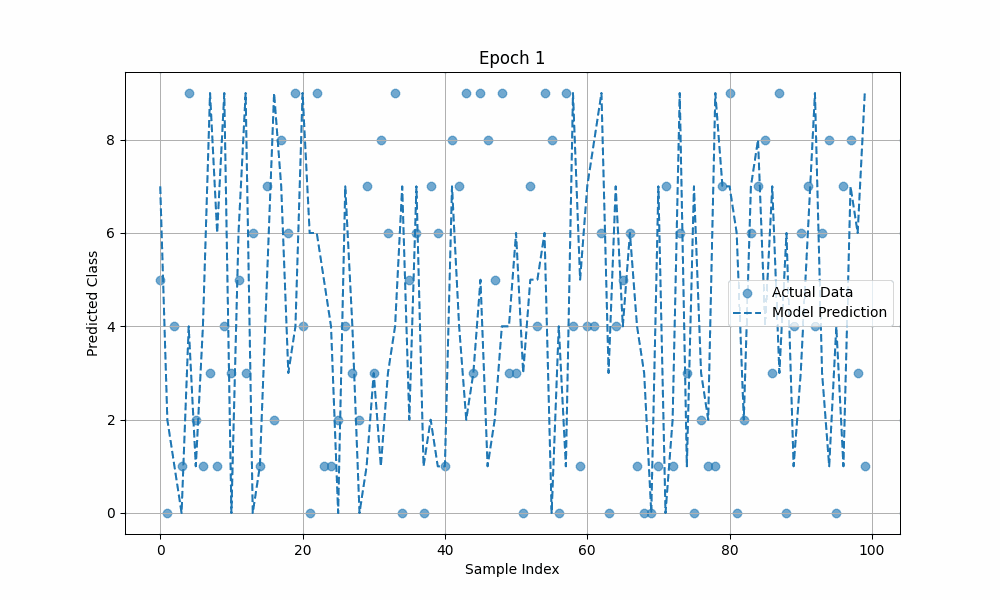

In [73]:
from IPython.display import Image, display

# Display the GIF
display(Image('/content/training_process.gif'))


1/1 [==============================] - 0s 27ms/step
Predicted label for x_test[0]: 1
----------------Lets Verify-----------------


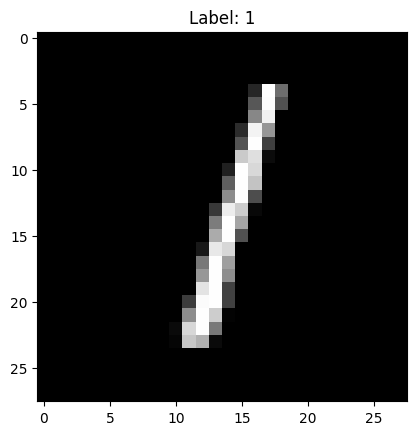

In [74]:
# Make a prediction for x_test[0]
x_test_sample = x_test[2].reshape(1, 28, 28)  # Reshape to (1, 28, 28) to match the input shape

# Predict the class probabilities
predictions = model.predict(x_test_sample)

# Get the predicted class (the index of the maximum probability)
predicted_label = np.argmax(predictions[0])

print(f'Predicted label for x_test[0]: {predicted_label}')

print ("----------------Lets Verify-----------------")
plt.imshow(x_test[2], cmap='gray')
plt.title(f'Label: {y_test[2]}')
plt.show()
